In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importamos librería
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [ ]:
df_bmw = pd.read_csv("/content/drive/MyDrive/MASTER DATA SCIENCE/DATA ANALYTICS & PREPROCESSING/ENTREGABLE - PREPROCESSING/bmw_pricing_v2.csv")

In [ ]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


# **DUPLICADOS**

In [ ]:
len(df_bmw[df_bmw.duplicated()])

0

# **NULOS**

In [ ]:
df_bmw.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [ ]:
df_bmw_nn = df_bmw.copy()

In [ ]:
df_bmw['marca'].unique()

array(['BMW', nan], dtype=object)

In [ ]:
# Todas las filas tienen marca BMW asi que rellenamos esos 2 valores nulos como BMW
df_bmw_nn['marca'].fillna('BMW', inplace=True)

In [ ]:
df_bmw_nn.dropna(inplace=True)

In [ ]:
df_bmw_nn.isnull().sum()

marca                          0
modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
dtype: int64

# **Fecha Venta**

In [ ]:
df_bmw_nn['fecha_venta'] = pd.to_datetime(df_bmw_nn['fecha_venta'])

In [ ]:
df_bmw_nn['fecha_registro'] = pd.to_datetime(df_bmw_nn['fecha_registro'])

In [ ]:
df_bmw_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4783 entries, 0 to 4841
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        4783 non-null   object        
 1   modelo                       4783 non-null   object        
 2   km                           4783 non-null   float64       
 3   potencia                     4783 non-null   float64       
 4   fecha_registro               4783 non-null   datetime64[ns]
 5   tipo_gasolina                4783 non-null   object        
 6   color                        4783 non-null   object        
 7   tipo_coche                   4783 non-null   object        
 8   volante_regulable            4783 non-null   object        
 9   aire_acondicionado           4783 non-null   object        
 10  camara_trasera               4783 non-null   object        
 11  asientos_traseros_plegables  4783 non-null 

In [ ]:
# Creamos columna diferencia de fechas
df_bmw_nn['dif_reg_venta'] = df_bmw_nn['fecha_venta'] - df_bmw_nn['fecha_registro']

In [ ]:
df_bmw_nn.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,dif_reg_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01,2161 days
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01,671 days
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01,2132 days
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01,1311 days
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01,1217 days


In [ ]:
df_bmw_sf = df_bmw_nn.copy()

In [ ]:
# Eliminamos columnas de fechas y mantenemos diferencia de fechas
df_bmw_sf.drop(['fecha_registro', 'fecha_venta'], axis=1, inplace=True)

In [ ]:
df_bmw_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4783 entries, 0 to 4841
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   marca                        4783 non-null   object         
 1   modelo                       4783 non-null   object         
 2   km                           4783 non-null   float64        
 3   potencia                     4783 non-null   float64        
 4   tipo_gasolina                4783 non-null   object         
 5   color                        4783 non-null   object         
 6   tipo_coche                   4783 non-null   object         
 7   volante_regulable            4783 non-null   object         
 8   aire_acondicionado           4783 non-null   object         
 9   camara_trasera               4783 non-null   object         
 10  asientos_traseros_plegables  4783 non-null   object         
 11  elevalunas_electrico         4

In [ ]:
# Reseteamos indices
df_bmw_sf.reset_index(inplace=True, drop = True)

# **SEPARAMOS TIPOS DE VARIABLES**

In [ ]:
df_bmw_sf['dif_reg_venta'] = df_bmw_sf['dif_reg_venta'].dt.days

In [ ]:
target = ["precio"]
def obtener_lista_variables(dataset):
  lista_numerica=[]
  lista_categorica=[]
  lista_bool=[]

  for i in dataset:
    if i not in target:
      if (dataset[i].dtype.kind == 'f') | (dataset[i].dtype.kind == 'i'):
        lista_numerica.append(i)
      elif dataset[i].dtype.kind == 'O':
        lista_categorica.append(i)
      elif dataset[i].dtype.kind == 'b':
        lista_bool.append(i)
  return lista_numerica, lista_categorica, lista_bool

In [ ]:
l_num, l_cat, l_bool = obtener_lista_variables(df_bmw_sf)

In [ ]:
l_num

['km', 'potencia', 'dif_reg_venta']

In [ ]:
l_cat

['marca', 'modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [ ]:
l_bool

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

# **Análisis variables**

**Numéricas**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


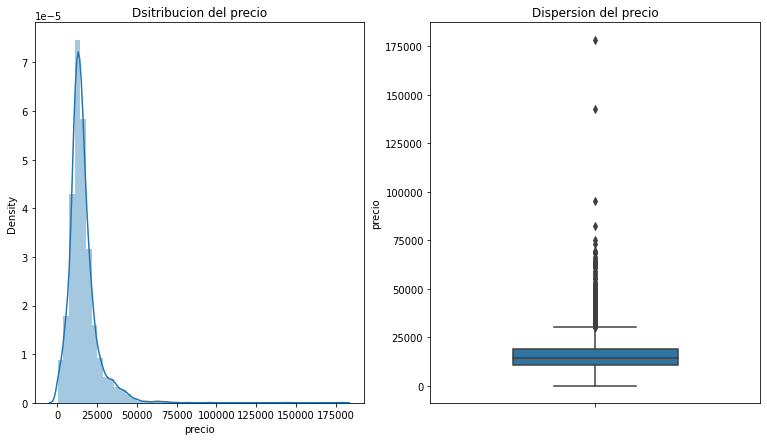

In [ ]:
plt.figure(figsize=(13,7))

plt.subplot(1,2,1)
plt.title('Dsitribucion del precio')
sns.distplot(df_bmw_sf.precio)

plt.subplot(1,2,2)
plt.title('Dispersion del precio')
sns.boxplot(y=df_bmw_sf.precio, width=0.5)

plt.show()

<AxesSubplot:xlabel='precio'>

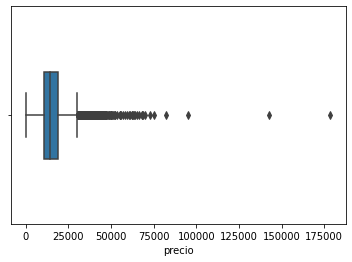

In [ ]:
sns.boxplot(x=df_bmw_sf.precio, width=0.4)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


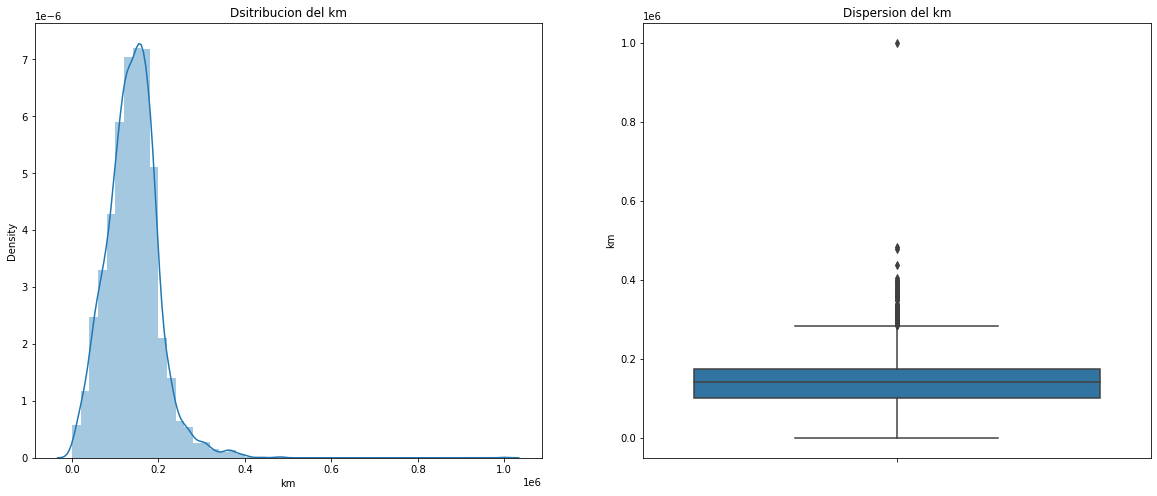

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Dsitribucion del km')
sns.distplot(df_bmw_sf.km)

plt.subplot(1,2,2)
plt.title('Dispersion del km')
sns.boxplot(y=df_bmw_sf.km)

plt.show()

[[<AxesSubplot:title={'center':'km'}>]]
[[<AxesSubplot:title={'center':'potencia'}>]]
[[<AxesSubplot:title={'center':'dif_reg_venta'}>]]


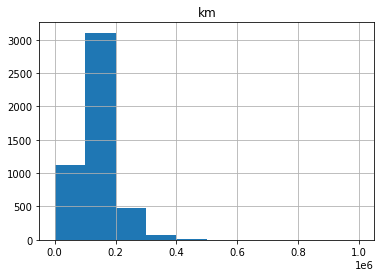

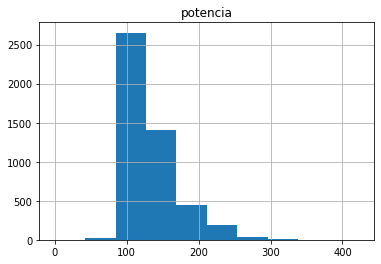

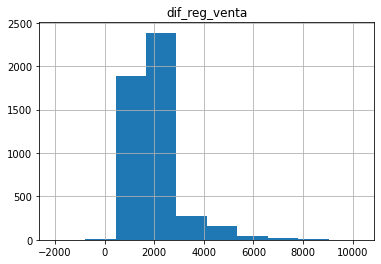

In [ ]:
for i in l_num:
  print(df_bmw_sf.hist(i))

In [ ]:
df_bmw_sf[df_bmw_sf['potencia'] < 50]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,dif_reg_venta
1746,BMW,i3,152328.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,20300.0,1520
1875,BMW,i3,152470.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500.0,1489
3709,BMW,X1,81770.0,0.0,diesel,white,suv,False,False,False,False,False,False,False,False,11700.0,1247


In [ ]:
df_bmw_sf.drop(df_bmw_sf[df_bmw_sf['potencia'] < 50].index, inplace=True)

In [ ]:
df_bmw_sf[df_bmw_sf['dif_reg_venta'] < 0]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,dif_reg_venta
42,BMW,330,142483.0,180.0,diesel,blue,convertible,True,True,False,False,True,False,True,True,15800.0,-1614
94,BMW,320,342768.0,135.0,diesel,black,coupe,False,True,False,False,True,False,True,False,8200.0,-609
171,BMW,320,181052.0,120.0,diesel,black,estate,False,True,False,False,False,False,True,True,11500.0,-2009
241,BMW,316,201102.0,85.0,diesel,black,estate,True,False,False,False,False,False,True,False,8800.0,-2009


In [ ]:
df_bmw_sf.drop(df_bmw_sf[df_bmw_sf['dif_reg_venta'] < 0].index, inplace=True)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5211cb54c0>]]


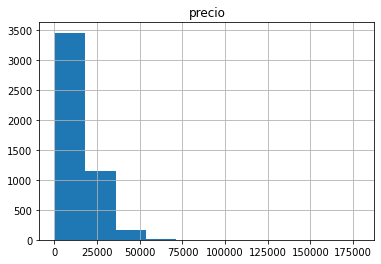

In [ ]:
print(df_bmw_sf.hist('precio'))

<AxesSubplot:xlabel='km', ylabel='precio'>

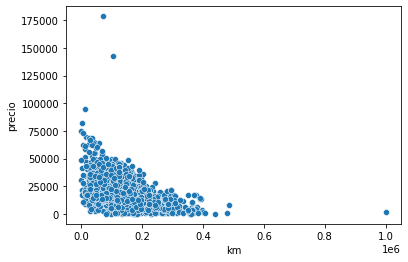

In [ ]:
sns.scatterplot(x='km', y='precio', data=df_bmw_sf)

<AxesSubplot:xlabel='potencia', ylabel='precio'>

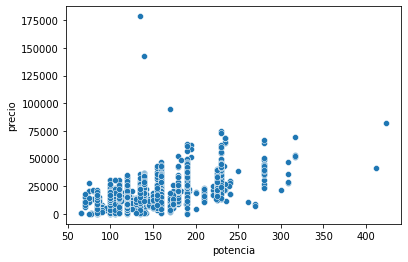

In [ ]:
sns.scatterplot(x='potencia', y='precio', data=df_bmw_sf)

<AxesSubplot:xlabel='dif_reg_venta', ylabel='precio'>

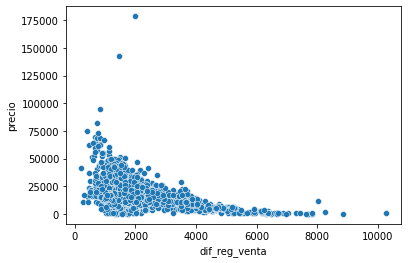

In [ ]:
sns.scatterplot(x='dif_reg_venta', y='precio', data=df_bmw_sf)

**Categóricas**

In [ ]:
for i in l_cat:
  print(df_bmw_sf[i].value_counts())

BMW    4760
Name: marca, dtype: int64
320                734
520                623
318                550
X3                 435
116                355
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64
diesel           4560
petrol            186
hybrid_petrol       6
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64
black     1605
grey      1159
blue       693
white      525
brown      340
silver     322
red         51
beige       41
green       18
orange       6
Name: color, dtype: int64
estate         1557
sedan          1160
suv            1052
hatchback       696
subcompact      113
coupe            95
convertible      46
van              41
Name: tipo_coche, dtype: int64


In [ ]:
# Eliminamos columna marca
df_bmw_sf.drop('marca', axis=1, inplace=True)
l_cat.remove('marca')

In [ ]:
df_bmw_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4760 entries, 0 to 4782
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4760 non-null   object 
 1   km                           4760 non-null   float64
 2   potencia                     4760 non-null   float64
 3   tipo_gasolina                4760 non-null   object 
 4   color                        4760 non-null   object 
 5   tipo_coche                   4760 non-null   object 
 6   volante_regulable            4760 non-null   object 
 7   aire_acondicionado           4760 non-null   object 
 8   camara_trasera               4760 non-null   object 
 9   asientos_traseros_plegables  4760 non-null   object 
 10  elevalunas_electrico         4760 non-null   object 
 11  bluetooth                    4760 non-null   object 
 12  gps                          4760 non-null   bool   
 13  alerta_lim_velocid

In [ ]:
# Cambiamos valores de Diesel por diesel
df_bmw_sf['tipo_gasolina'] = np.where(df_bmw_sf['tipo_gasolina'] == 'Diesel', 'diesel', df_bmw_sf['tipo_gasolina'])

In [ ]:
# Reseteamos indices
df_bmw_sf.reset_index(inplace=True, drop = True)

In [ ]:
df_bmw_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4760 non-null   object 
 1   km                           4760 non-null   float64
 2   potencia                     4760 non-null   float64
 3   tipo_gasolina                4760 non-null   object 
 4   color                        4760 non-null   object 
 5   tipo_coche                   4760 non-null   object 
 6   volante_regulable            4760 non-null   object 
 7   aire_acondicionado           4760 non-null   object 
 8   camara_trasera               4760 non-null   object 
 9   asientos_traseros_plegables  4760 non-null   object 
 10  elevalunas_electrico         4760 non-null   object 
 11  bluetooth                    4760 non-null   object 
 12  gps                          4760 non-null   bool   
 13  alerta_lim_velocid

In [ ]:
for i in l_cat:
  print(df_bmw_sf[i].value_counts())

320                734
520                623
318                550
X3                 435
116                355
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64
diesel           4565
petrol            186
hybrid_petrol       6
electro             3
Name: tipo_gasolina, dtype: int64
black     1605
grey      1159
blue       693
white      525
brown      340
silver     322
red         51
beige       41
green       18
orange       6
Name: color, dtype: int64
estate         1557
sedan          1160
suv            1052
hatchback       696
subcompact      113
coupe            95
convertible      46
van              41
Name: tipo_coche, dtype: int64


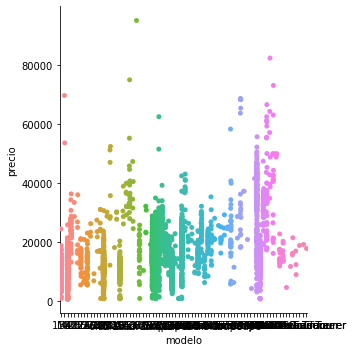

In [ ]:
sns.catplot(x='modelo', y="precio", data=df_bmw_sf)

In [ ]:
# Eliminamos columna modelo
df_bmw_sf.drop('modelo', axis=1, inplace=True)
l_cat.remove('modelo')

<AxesSubplot:xlabel='tipo_gasolina', ylabel='Percent'>

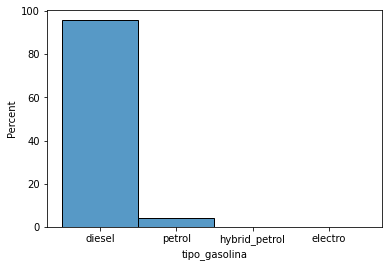

In [ ]:
sns.histplot(x= 'tipo_gasolina', data=df_bmw_sf, stat='percent')

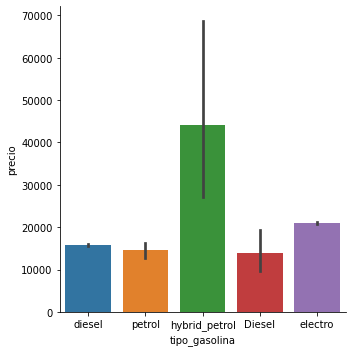

In [ ]:
sns.catplot(x='tipo_gasolina', y="precio", kind='bar', data=df_bmw_sf)

In [ ]:
# Eliminamos columna tipo_gasolina
df_bmw_sf.drop('tipo_gasolina', axis=1, inplace=True)
l_cat.remove('tipo_gasolina')

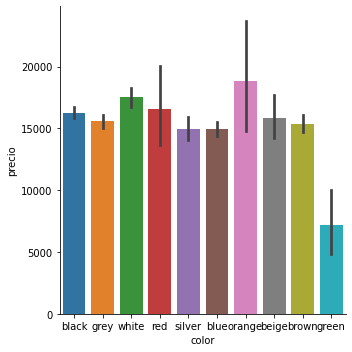

In [ ]:
sns.catplot(x='color', y="precio", kind='bar', data=df_bmw_sf)

<AxesSubplot:xlabel='color', ylabel='Percent'>

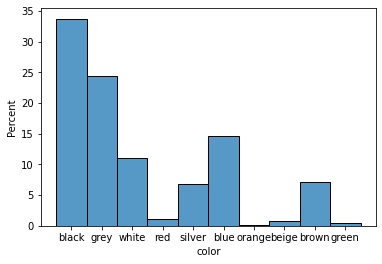

In [ ]:
sns.histplot(x= 'color', data=df_bmw_sf, stat='percent')

In [ ]:
df_bmw_sf['color'].value_counts()

black     1605
grey      1159
blue       693
white      525
brown      340
silver     322
red         51
beige       41
green       18
orange       6
Name: color, dtype: int64

In [ ]:
# Eliminamos columna color
df_bmw_sf.drop('color', axis=1, inplace=True)

In [ ]:
l_cat.remove('color')

In [ ]:
def quitar_por_umbrales(dataset, columna, umbral):
  mi_df = pd.DataFrame(dataset[columna].value_counts())
  mi_df = mi_df.reset_index()
  
  mi_lista = []
  for i in range(len(mi_df)):
    if mi_df.iloc[i][columna] <= umbral:
      mi_lista.append(mi_df.iloc[i]['index'])
  
  for i in mi_lista:
    dataset[columna] = np.where(dataset[columna] == i, 'otro', dataset[columna])

In [ ]:
l_cat.remove('color')

In [ ]:
l_cat.remove('modelo')

In [ ]:
l_cat.remove('tipo_gasolina')

In [ ]:
quitar_por_umbrales(df_bmw_sf, 'tipo_coche', 100)

In [ ]:
for i in l_cat:
  print(df_bmw_sf[i].value_counts())

estate        1557
sedan         1160
suv           1052
hatchback      696
otro           182
subcompact     113
Name: tipo_coche, dtype: int64


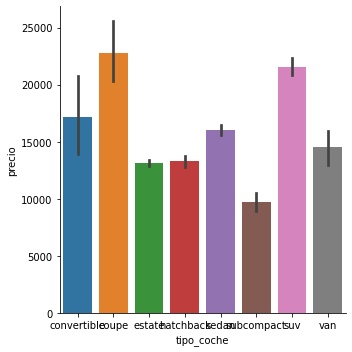

In [ ]:
sns.catplot(x='tipo_coche', y="precio", kind='bar', data=df_bmw_sf)

<AxesSubplot:xlabel='tipo_coche', ylabel='Percent'>

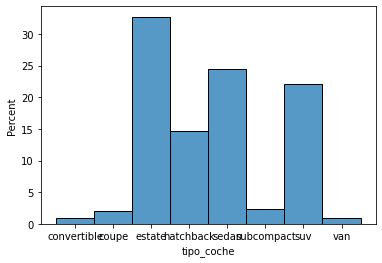

In [ ]:
sns.histplot(x= 'tipo_coche', data=df_bmw_sf, stat='percent')

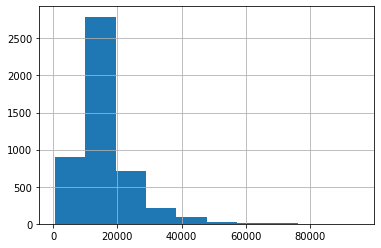

In [ ]:
df_bmw_sf['precio'].hist()

In [ ]:
len(df_bmw_sf[df_bmw_sf['precio'] < 500])

0

In [ ]:
l_bool

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

AxesSubplot(0.125,0.125;0.775x0.755)


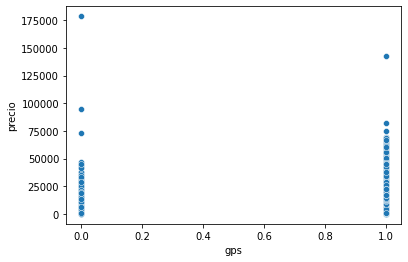

In [ ]:
#for i in l_bool:
print(sns.scatterplot(x='gps', y="precio", data=df_bmw_sf))

In [ ]:
df_bmw_sf[(df_bmw_sf['gps'] == True) & (df_bmw_sf['precio'] > 1e5)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,dif_reg_venta
4621,X4,103222.0,140.0,diesel,grey,suv,True,True,False,False,True,False,True,True,142800.0,1461


In [ ]:
# Eliminamos columna gps
df_bmw_sf.drop('gps', axis=1, inplace=True)

In [ ]:
l_bool.remove('gps')

In [ ]:
l_num

['km', 'potencia', 'dif_reg_venta']

AxesSubplot(0.125,0.125;0.775x0.755)


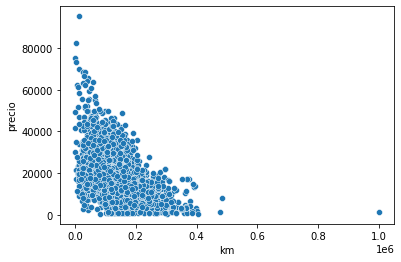

In [ ]:
print(sns.scatterplot(x='km', y="precio", data=df_bmw_sf))

AxesSubplot(0.125,0.125;0.775x0.755)


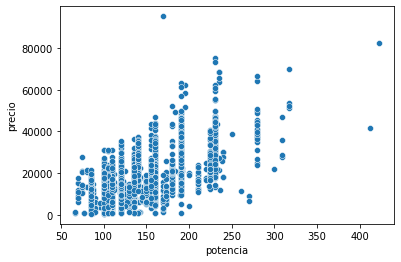

In [ ]:
print(sns.scatterplot(x='potencia', y="precio", data=df_bmw_sf))

AxesSubplot(0.125,0.125;0.775x0.755)


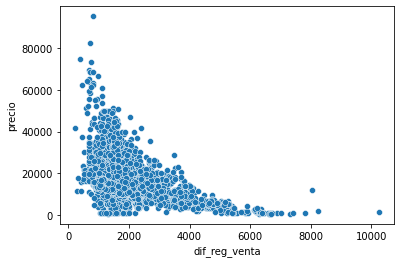

In [ ]:
print(sns.scatterplot(x='dif_reg_venta', y="precio", data=df_bmw_sf))

# **Correlaciones**

In [ ]:
df_bmw_uni = df_bmw_sf.copy()

In [ ]:
df_bmw_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4776 entries, 0 to 4775
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4776 non-null   object 
 1   km                           4776 non-null   float64
 2   potencia                     4776 non-null   float64
 3   tipo_gasolina                4776 non-null   object 
 4   color                        4776 non-null   object 
 5   tipo_coche                   4776 non-null   object 
 6   volante_regulable            4776 non-null   object 
 7   aire_acondicionado           4776 non-null   object 
 8   camara_trasera               4776 non-null   object 
 9   asientos_traseros_plegables  4776 non-null   object 
 10  elevalunas_electrico         4776 non-null   object 
 11  bluetooth                    4776 non-null   object 
 12  gps                          4776 non-null   bool   
 13  alerta_lim_velocid

In [ ]:
# Reseteamos indices
df_bmw_sf.reset_index(inplace=True, drop = True)

In [ ]:
for i in l_bool:
  df_bmw_uni[i] = df_bmw_uni[i].astype(bool)

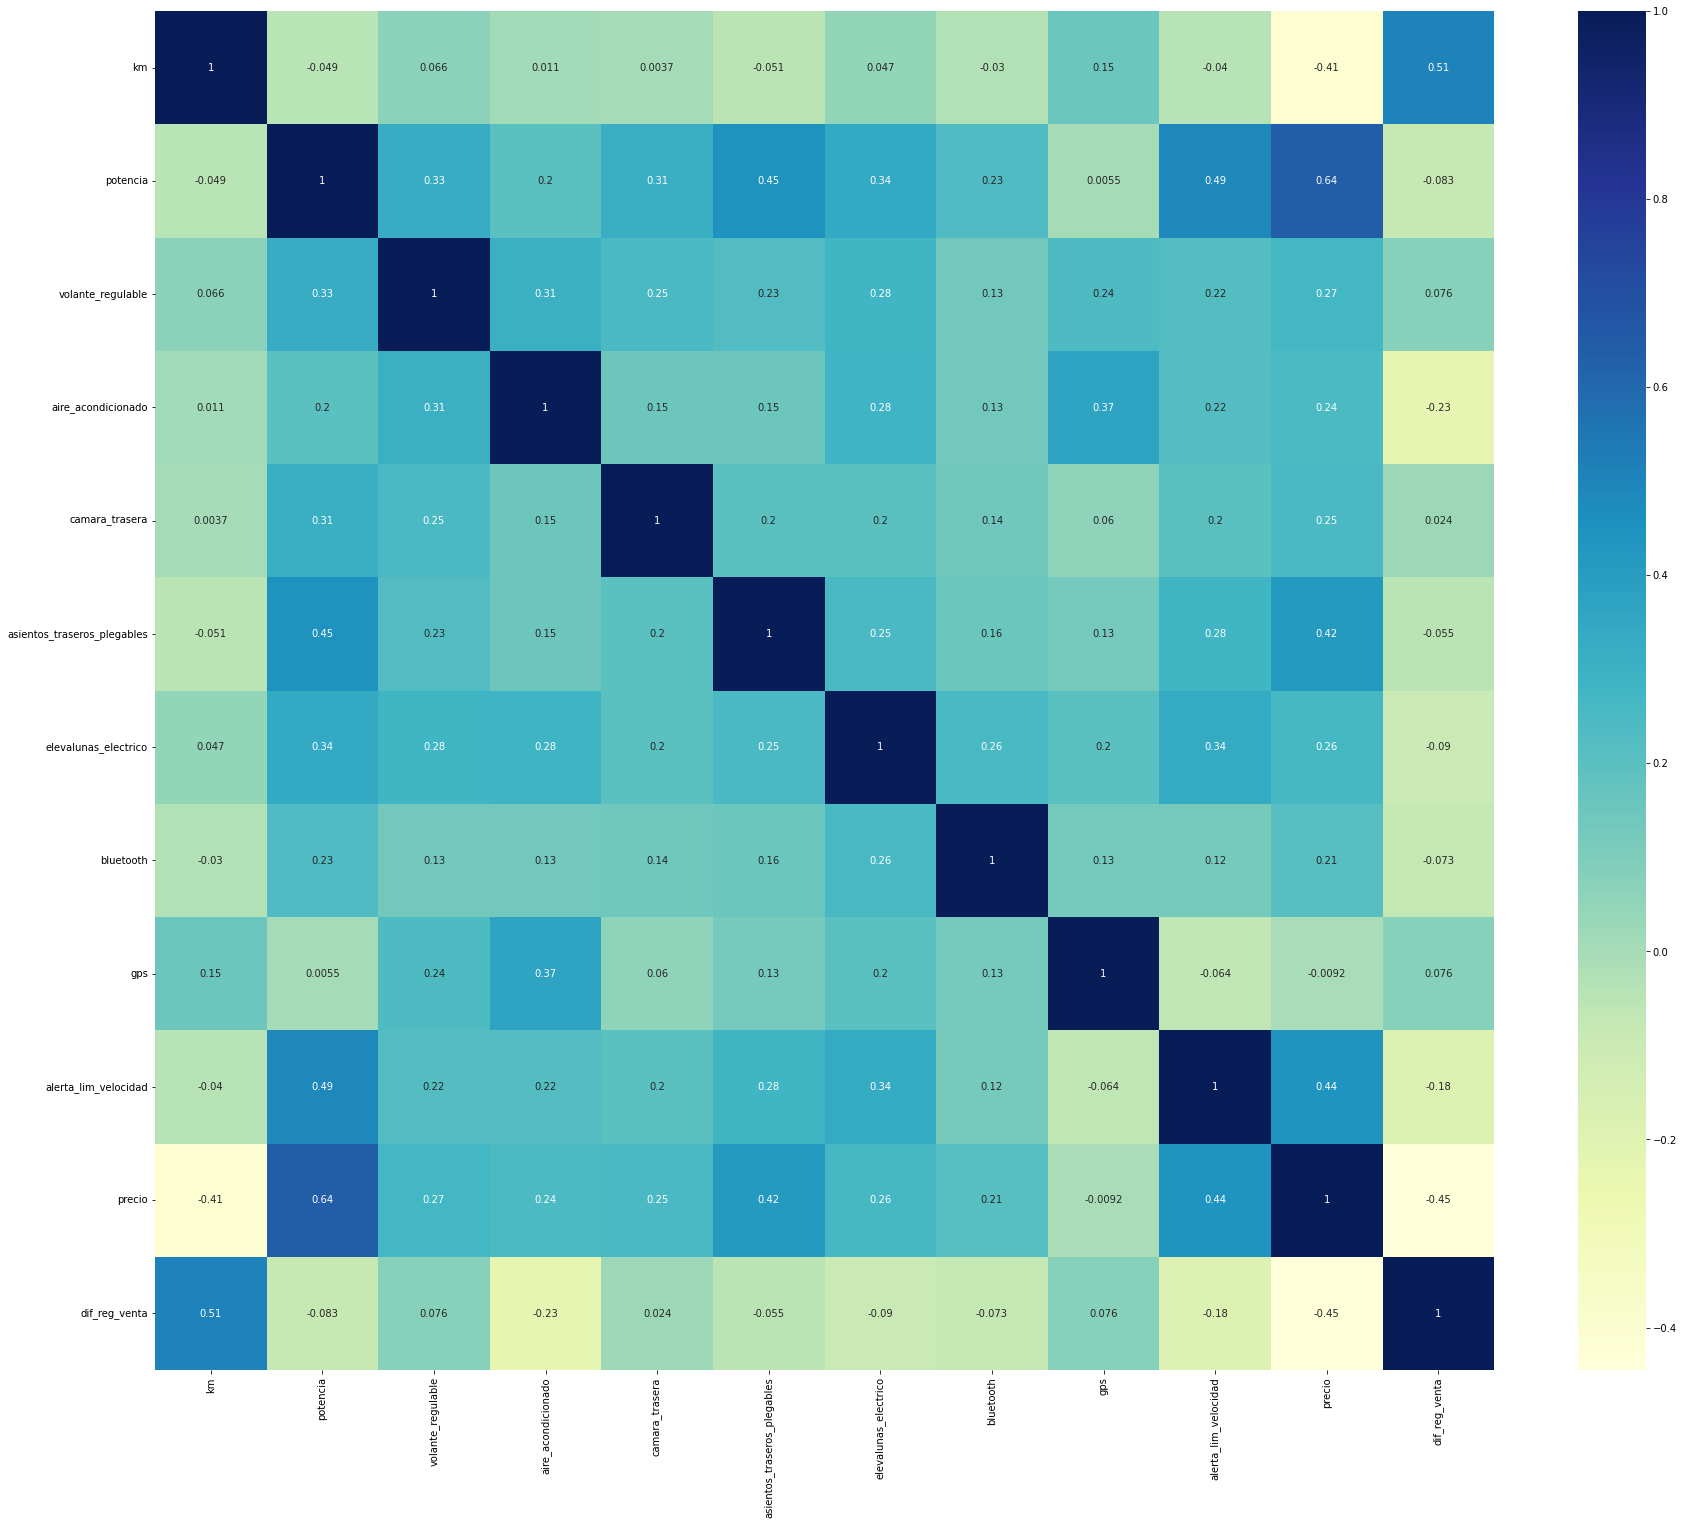

In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_bmw_uni.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
corr = df_bmw_uni.corr()
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,dif_reg_venta
km,1.000000,-0.044653,0.071486,0.018172,0.003769,-0.049623,0.048845,-0.028034,0.152601,-0.035219,-0.422921,0.504004
potencia,-0.044653,1.000000,0.325884,0.197515,0.313451,0.449512,0.340820,0.232760,0.006931,0.491504,0.675433,-0.074198
volante_regulable,0.071486,0.325884,1.000000,0.306449,0.254236,0.231298,0.279660,0.133064,0.241595,0.223846,0.282270,0.088646
aire_acondicionado,0.018172,0.197515,0.306449,1.000000,0.150914,0.148582,0.283825,0.133268,0.370132,0.222713,0.259599,-0.215887
camara_trasera,0.003769,0.313451,0.254236,0.150914,1.000000,0.201108,0.200255,0.142845,0.061441,0.202618,0.259054,0.027029
asientos_traseros_plegables,-0.049623,0.449512,0.231298,0.148582,0.201108,1.000000,0.249316,0.154382,0.125914,0.279479,0.441730,-0.051468
elevalunas_electrico,0.048845,0.340820,0.279660,0.283825,0.200255,0.249316,1.000000,0.256194,0.200783,0.337081,0.274093,-0.087101
bluetooth,-0.028034,0.232760,0.133064,0.133268,0.142845,0.154382,0.256194,1.000000,0.127988,0.122354,0.224939,-0.069621
gps,0.152601,0.006931,0.241595,0.370132,0.061441,0.125914,0.200783,0.127988,1.000000,-0.061874,0.002376,0.075310
alerta_lim_velocidad,-0.035219,0.491504,0.223846,0.222713,0.202618,0.279479,0.337081,0.122354,-0.061874,1.000000,0.464174,-0.179816


In [ ]:
l_cat

['tipo_coche']

# **Reescalado**

In [ ]:
df_bmw_scaled = pd.get_dummies(data=df_bmw_uni, columns=l_cat)

In [ ]:
df_bmw_scaled = pd.get_dummies(data=df_bmw_scaled, columns=l_bool)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
for i in l_num: 
  df_bmw_scaled[i] = scaler.fit_transform(df_bmw_scaled[i].values.reshape(-1, 1))

In [ ]:
corr = df_bmw_scaled.corr()
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,dif_reg_venta,log_precio,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,volante_regulable_False,volante_regulable_True,aire_acondicionado_False,aire_acondicionado_True,camara_trasera_False,camara_trasera_True,asientos_traseros_plegables_False,asientos_traseros_plegables_True,elevalunas_electrico_False,elevalunas_electrico_True,bluetooth_False,bluetooth_True,gps_False,gps_True,alerta_lim_velocidad_False,alerta_lim_velocidad_True
km,1.000000,-0.044653,0.504004,-0.442848,0.179700,-0.111113,-0.112553,0.059004,-0.022699,-0.109272,-0.071486,0.071486,-0.018172,0.018172,-0.003769,0.003769,0.049623,-0.049623,-0.048845,0.048845,0.028034,-0.028034,-0.152601,0.152601,0.035219,-0.035219
potencia,-0.044653,1.000000,-0.074198,0.535396,-0.053910,-0.226258,0.084344,0.035752,-0.159891,0.236315,-0.325884,0.325884,-0.197515,0.197515,-0.313451,0.313451,-0.449512,0.449512,-0.340820,0.340820,-0.232760,0.232760,-0.006931,0.006931,-0.491504,0.491504
dif_reg_venta,0.504004,-0.074198,1.000000,-0.617805,-0.010680,-0.067868,0.014520,0.076108,0.026005,-0.025131,-0.088646,0.088646,0.215887,-0.215887,-0.027029,0.027029,0.051468,-0.051468,0.087101,-0.087101,0.069621,-0.069621,-0.075310,0.075310,0.179816,-0.179816
log_precio,-0.442848,0.535396,-0.617805,1.000000,-0.175453,-0.098383,0.051129,0.035469,-0.120883,0.266184,-0.253455,0.253455,-0.344313,0.344313,-0.206399,0.206399,-0.371347,0.371347,-0.328454,0.328454,-0.211439,0.211439,-0.040501,0.040501,-0.444806,0.444806
tipo_coche_estate,0.179700,-0.053910,-0.010680,-0.175453,1.000000,-0.288532,-0.139016,-0.395771,-0.108722,-0.371367,0.002344,-0.002344,-0.097036,0.097036,0.034553,-0.034553,0.152297,-0.152297,-0.042553,0.042553,0.023108,-0.023108,-0.050248,0.050248,-0.013553,0.013553
tipo_coche_hatchback,-0.111113,-0.226258,-0.067868,-0.098383,-0.288532,1.000000,-0.082514,-0.234912,-0.064533,-0.220428,0.152711,-0.152711,0.090291,-0.090291,0.047080,-0.047080,0.154345,-0.154345,0.096220,-0.096220,-0.016600,0.016600,-0.010710,0.010710,0.175721,-0.175721
tipo_coche_otro,-0.112553,0.084344,0.014520,0.051129,-0.139016,-0.082514,1.000000,-0.113182,-0.031092,-0.106203,-0.022921,0.022921,0.051435,-0.051435,0.018600,-0.018600,0.061833,-0.061833,-0.037097,0.037097,-0.099127,0.099127,0.016854,-0.016854,-0.005174,0.005174
tipo_coche_sedan,0.059004,0.035752,0.076108,0.035469,-0.395771,-0.234912,-0.113182,1.000000,-0.088518,-0.302354,-0.055933,0.055933,-0.056353,0.056353,0.008138,-0.008138,0.128717,-0.128717,-0.021461,0.021461,0.022498,-0.022498,-0.034289,0.034289,-0.026775,0.026775
tipo_coche_subcompact,-0.022699,-0.159891,0.026005,-0.120883,-0.108722,-0.064533,-0.031092,-0.088518,1.000000,-0.083060,0.106740,-0.106740,0.150646,-0.150646,0.040745,-0.040745,0.078276,-0.078276,0.103040,-0.103040,0.046480,-0.046480,-0.036196,0.036196,0.141945,-0.141945
tipo_coche_suv,-0.109272,0.236315,-0.025131,0.266184,-0.371367,-0.220428,-0.106203,-0.302354,-0.083060,1.000000,-0.103386,0.103386,0.012094,-0.012094,-0.111125,0.111125,-0.494107,0.494107,-0.032275,0.032275,-0.006511,0.006511,0.106905,-0.106905,-0.156294,0.156294


In [ ]:
l_bool

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [ ]:
df_bmw_final = df_bmw_scaled.copy()

In [ ]:
df_bmw_final.drop(['volante_regulable_False', 'aire_acondicionado_False', 
                   'camara_trasera_False', 'asientos_traseros_plegables_False',
                   'elevalunas_electrico_False', 'bluetooth_False', 'gps_False',
                   'alerta_lim_velocidad_False'], axis=1, inplace=True)

In [ ]:
corr = df_bmw_final.corr()
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,dif_reg_venta,log_precio,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,volante_regulable_True,aire_acondicionado_True,camara_trasera_True,asientos_traseros_plegables_True,elevalunas_electrico_True,bluetooth_True,gps_True,alerta_lim_velocidad_True
km,1.000000,-0.044653,0.504004,-0.442848,0.179700,-0.111113,-0.112553,0.059004,-0.022699,-0.109272,0.071486,0.018172,0.003769,-0.049623,0.048845,-0.028034,0.152601,-0.035219
potencia,-0.044653,1.000000,-0.074198,0.535396,-0.053910,-0.226258,0.084344,0.035752,-0.159891,0.236315,0.325884,0.197515,0.313451,0.449512,0.340820,0.232760,0.006931,0.491504
dif_reg_venta,0.504004,-0.074198,1.000000,-0.617805,-0.010680,-0.067868,0.014520,0.076108,0.026005,-0.025131,0.088646,-0.215887,0.027029,-0.051468,-0.087101,-0.069621,0.075310,-0.179816
log_precio,-0.442848,0.535396,-0.617805,1.000000,-0.175453,-0.098383,0.051129,0.035469,-0.120883,0.266184,0.253455,0.344313,0.206399,0.371347,0.328454,0.211439,0.040501,0.444806
tipo_coche_estate,0.179700,-0.053910,-0.010680,-0.175453,1.000000,-0.288532,-0.139016,-0.395771,-0.108722,-0.371367,-0.002344,0.097036,-0.034553,-0.152297,0.042553,-0.023108,0.050248,0.013553
tipo_coche_hatchback,-0.111113,-0.226258,-0.067868,-0.098383,-0.288532,1.000000,-0.082514,-0.234912,-0.064533,-0.220428,-0.152711,-0.090291,-0.047080,-0.154345,-0.096220,0.016600,0.010710,-0.175721
tipo_coche_otro,-0.112553,0.084344,0.014520,0.051129,-0.139016,-0.082514,1.000000,-0.113182,-0.031092,-0.106203,0.022921,-0.051435,-0.018600,-0.061833,0.037097,0.099127,-0.016854,0.005174
tipo_coche_sedan,0.059004,0.035752,0.076108,0.035469,-0.395771,-0.234912,-0.113182,1.000000,-0.088518,-0.302354,0.055933,0.056353,-0.008138,-0.128717,0.021461,-0.022498,0.034289,0.026775
tipo_coche_subcompact,-0.022699,-0.159891,0.026005,-0.120883,-0.108722,-0.064533,-0.031092,-0.088518,1.000000,-0.083060,-0.106740,-0.150646,-0.040745,-0.078276,-0.103040,-0.046480,0.036196,-0.141945
tipo_coche_suv,-0.109272,0.236315,-0.025131,0.266184,-0.371367,-0.220428,-0.106203,-0.302354,-0.083060,1.000000,0.103386,-0.012094,0.111125,0.494107,0.032275,0.006511,-0.106905,0.156294


In [ ]:
################## MODELO ####################

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_bmw_final.drop('log_precio', axis=1)

In [ ]:
y = df_bmw_final['log_precio']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
y_test

534     4.089905
4432    4.146128
436     4.176091
1331    4.305351
137     4.376577
          ...   
956     4.164353
4306    4.624282
1582    4.053078
1984    4.123852
2170    4.184691
Name: log_precio, Length: 1428, dtype: float64

In [ ]:
y_pred

array([4.13292739, 4.11178834, 4.15573167, ..., 4.01891339, 4.0925324 ,
       4.07178175])

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

0.023567010749284564

In [ ]:
metrics.mean_absolute_error(y_test, y_pred)

0.08102951245925391

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.15351550654342566

In [ ]:
metrics.r2_score(y_test, y_pred)

0.6828912671481322

In [ ]:
df_bmw_final['log_precio'].describe()

count    4760.000000
mean        4.136020
std         0.259218
min         2.698970
25%         4.037426
50%         4.152288
75%         4.271842
max         4.978637
Name: log_precio, dtype: float64

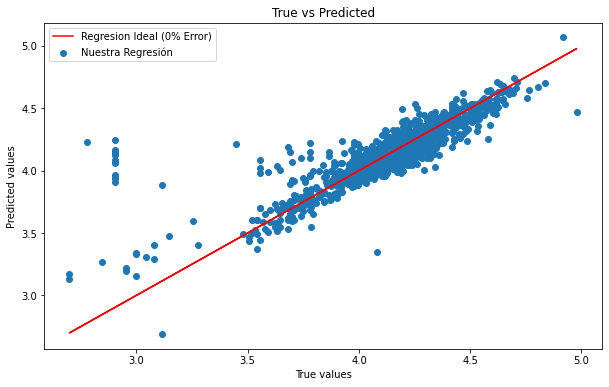

In [ ]:
#Compara Prediccion vs dato real
plt.figure(figsize=[10,6])
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')
plt.title('True vs Predicted')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend(['Regresion Ideal (0% Error)','Nuestra Regresión'])
plt.show()

In [ ]:
y_pred 

,km,potencia,precio,dif_reg_venta,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro,tipo_coche_sedan,tipo_coche_suv,volante_regulable_True,aire_acondicionado_True,camara_trasera_True,asientos_traseros_plegables_True,elevalunas_electrico_True,bluetooth_True,gps_True,alerta_lim_velocidad_True
155,1.149099,0.147965,800.0,-0.368663,1,0,0,0,0,0,0,0,0,0,0,0,1
160,0.102586,0.147965,800.0,-0.776534,1,0,0,0,0,0,1,0,0,0,0,1,1
161,0.325774,-1.134285,800.0,-0.197693,1,0,0,0,0,0,0,0,0,0,0,0,1
173,-0.660544,-0.236710,800.0,-0.709486,1,0,0,0,0,0,1,0,0,0,0,1,1
182,0.418318,0.147965,800.0,-0.030075,1,0,0,0,0,0,0,0,0,0,0,1,0
186,0.496059,-0.621385,800.0,-0.979910,1,0,0,0,0,0,1,0,0,0,0,1,1
197,-0.218181,1.558440,800.0,-0.472586,1,0,0,0,0,0,1,0,0,0,0,1,1
206,0.110246,-0.621385,800.0,-0.232334,1,0,0,0,0,0,0,0,0,0,0,0,1
227,0.175008,0.147965,800.0,0.244819,1,0,0,0,0,0,0,0,0,0,0,1,0
304,-0.167351,0.789090,800.0,-0.672610,1,0,0,0,0,0,1,0,0,0,0,1,1


In [ ]:
y_pred-y_test

534      2722.799879
4432    -1201.149788
436      -364.832971
1331    -2799.835979
137     -3476.688439
            ...     
956      -251.859845
4306   -10169.858595
1582     -344.361034
1984    -1736.269726
2170    -2127.178732
Name: precio, Length: 1428, dtype: float64

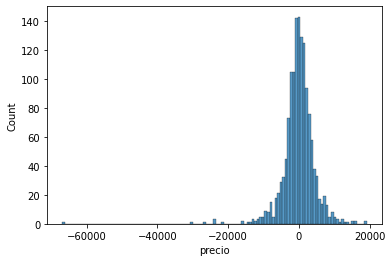

In [ ]:
sns.histplot(y_pred-y_test)